In [47]:
import pandas as pd
import numpy as np
import plotly.express as px



import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

%matplotlib inline

In [48]:
df = pd.read_csv('../../Data/complete_fire.csv')

In [49]:
df.head()

unique_fire_identifier   lattitude  longitude  acres_burned fire_cause  \
0      2003-WYCMX-200237 -105.563067  44.603340    139.091837    Unknown   
1      2004-CABDU-006784 -117.076679  34.733894   1906.698008    Unknown   
2      2008-IDGBK-000002 -116.216680  43.666673    685.728842    Unknown   
3      2008-IDCTF-008902 -111.426912  42.096336     20.000000    Unknown   
4      2008-AZPNF-000975 -112.072414  34.598306     77.946287    Unknown   

       incident_name  IsFSAssisted   origin_county state  year  ...  \
0           SCHWARTZ           1.0        Campbell    WY  2003  ...   
1            MENTONE           1.0  San Bernardino    CA  2004  ...   
2  NIFC RAMP SUPPORT           1.0             Ada    ID  2008  ...   
3     St. Charles RX           0.0       Bear Lake    ID  2008  ...   
4   Mingus/Cherry Rx           0.0         Yavapai    AZ  2008  ...   

   area (acres)  population  d0  d1  d2  d3  d4  DSCI_avg  DSCI_summed  \
0           NaN         NaN NaN NaN NaN NaN NaN       NaN          NaN   
1           NaN         NaN NaN NaN NaN NaN NaN       NaN          NaN   
2           NaN         NaN NaN NaN NaN NaN NaN       NaN          NaN   
3           NaN         NaN NaN NaN NaN NaN NaN       NaN          NaN   
4           NaN         NaN NaN NaN NaN NaN NaN       NaN          NaN   

   precipitation(in)  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  

[5 rows x 23 columns]

In [50]:
df.isnull().sum()

unique_fire_identifier        0
lattitude                     0
longitude                     0
acres_burned                  0
fire_cause                    0
incident_name                 0
IsFSAssisted                  0
origin_county                 0
state                         0
year                          0
month                         0
value                     40987
anomaly                   40987
area (acres)              39756
population                39756
d0                        34889
d1                        34889
d2                        34889
d3                        34889
d4                        34889
DSCI_avg                  34889
DSCI_summed               34889
precipitation(in)         42654
dtype: int64

In [51]:
df['state'].value_counts().sort_index()

AK     3999
AL     1106
AR     1562
AZ    15803
CA    47626
CO     8304
CT        4
DC       22
DE        2
FL     4793
GA      476
HI       38
IA      267
ID     9472
IL      595
IN      267
KS      552
KY      932
LA      712
MA      163
MD       89
ME     3031
MI     1480
MN     6614
MO     1155
MS     2053
MT    14908
NC      847
ND     7809
NE      498
NH      106
NJ       87
NM     7908
NV     4937
NY      185
OH      499
OK     6508
OR    14191
PA      270
SC      890
SD     5618
TN      633
TX     7033
UT     9676
VA      559
VT       78
WA    10958
WI      403
WV      277
WY     7792
Name: state, dtype: int64

In [52]:
df = df.dropna()

In [53]:
df.isnull().sum()

unique_fire_identifier    0
lattitude                 0
longitude                 0
acres_burned              0
fire_cause                0
incident_name             0
IsFSAssisted              0
origin_county             0
state                     0
year                      0
month                     0
value                     0
anomaly                   0
area (acres)              0
population                0
d0                        0
d1                        0
d2                        0
d3                        0
d4                        0
DSCI_avg                  0
DSCI_summed               0
precipitation(in)         0
dtype: int64

In [54]:
df = df.drop(columns = ['incident_name'])

In [55]:
df.head()

unique_fire_identifier   lattitude  longitude  acres_burned  \
34889      2016-IDBOD-000058 -116.330913  43.406206           0.1   
34890      2016-MNRLA-000184  -94.916910  48.017407           0.1   
34891      2016-MNRLA-000185  -95.015306  47.875908           0.1   
34892      2016-AZA5S-002056 -112.761608  34.201307           0.5   
34893      2016-AZNAA-000033 -108.537233  36.744172           0.5   

         fire_cause  IsFSAssisted origin_county state  year  month  ...  \
34889         Human           1.0           Ada    ID  2016      4  ...   
34890  Undetermined           0.0      Beltrami    MN  2016      4  ...   
34891  Undetermined           0.0      Beltrami    MN  2016      4  ...   
34892  Undetermined           0.0       Yavapai    AZ  2016      4  ...   
34893         Human           1.0      San Juan    NM  2016      4  ...   

       area (acres)  population         d0         d1        d2   d3   d4  \
34889    53487360.0   1684036.0   8.043333   0.000000  0.000000  0.0  0.0   
34890    55643520.0   5525360.0   9.663333   1.026667  0.000000  0.0  0.0   
34891    55643520.0   5525360.0   9.663333   1.026667  0.000000  0.0  0.0   
34892    72963840.0   6944767.0  32.776667  65.580000  1.170000  0.0  0.0   
34893    77819520.0   2092555.0  53.023333  43.686667  0.086667  0.0  0.0   

         DSCI_avg  DSCI_summed  precipitation(in)  
34889    8.043333        24.13           0.040772  
34890   11.716667        35.15           0.040886  
34891   11.716667        35.15           0.040886  
34892  167.446667       502.34           0.031042  
34893  140.656667       421.97           0.235141  

[5 rows x 22 columns]

<AxesSubplot:>

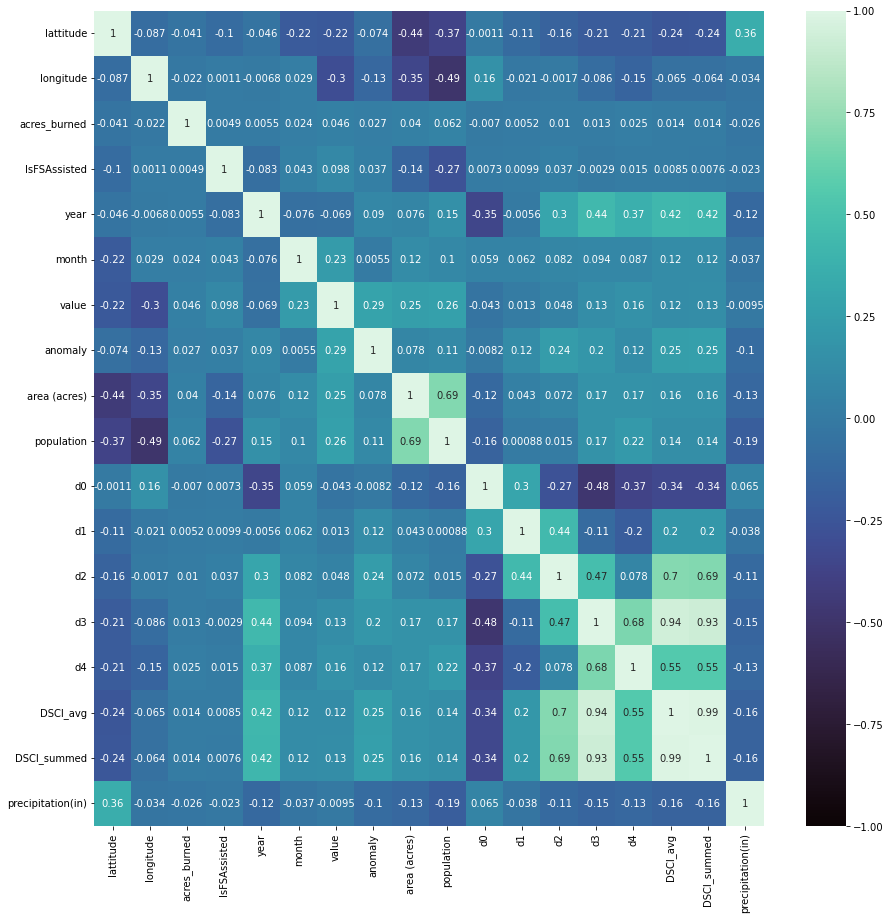

In [56]:
corr = df.corr()
plt.figure(figsize = (15,15))
sns.heatmap(corr, annot = True, cmap = 'mako', vmin = -1, vmax = 1)

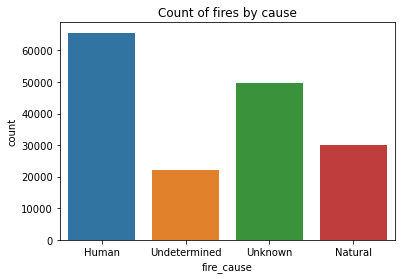

In [57]:
#Count of fires by cause
sns.countplot(x='fire_cause', data = df);
plt.title("Count of fires by cause");

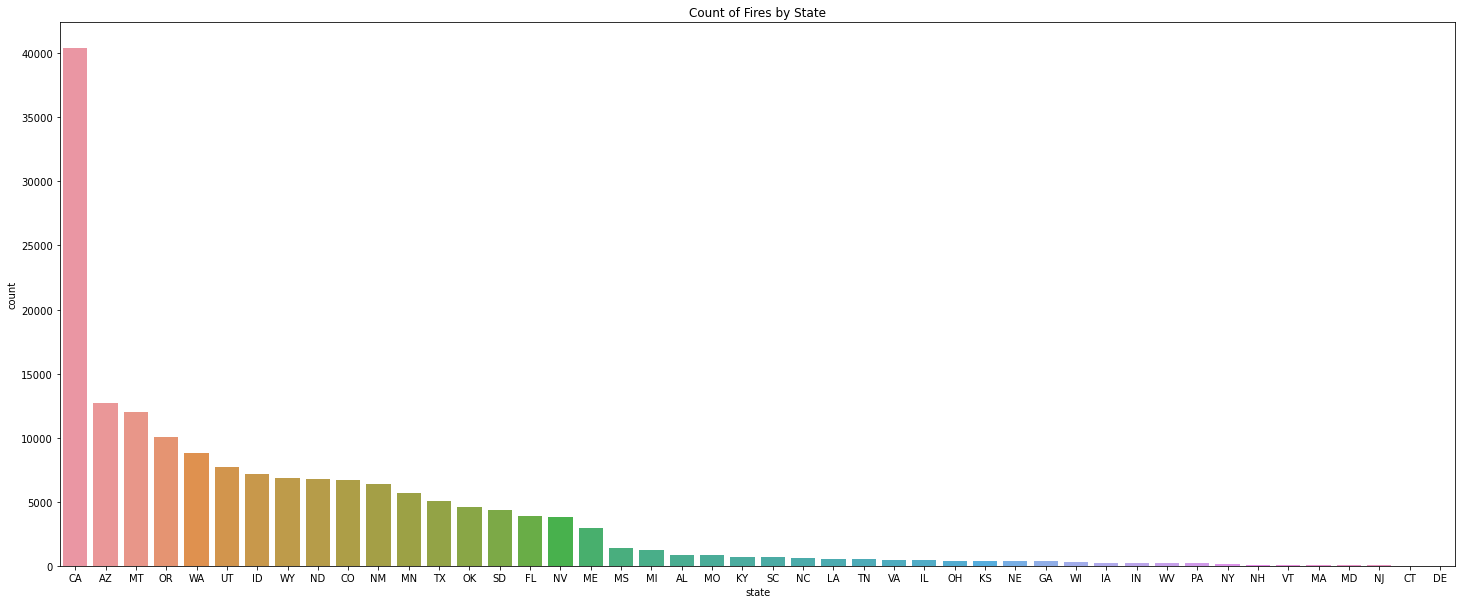

In [58]:
plt.figure(figsize = (25,10))
sns.countplot(x='state', data=df, order = df['state'].value_counts().index);
plt.title("Count of Fires by State");

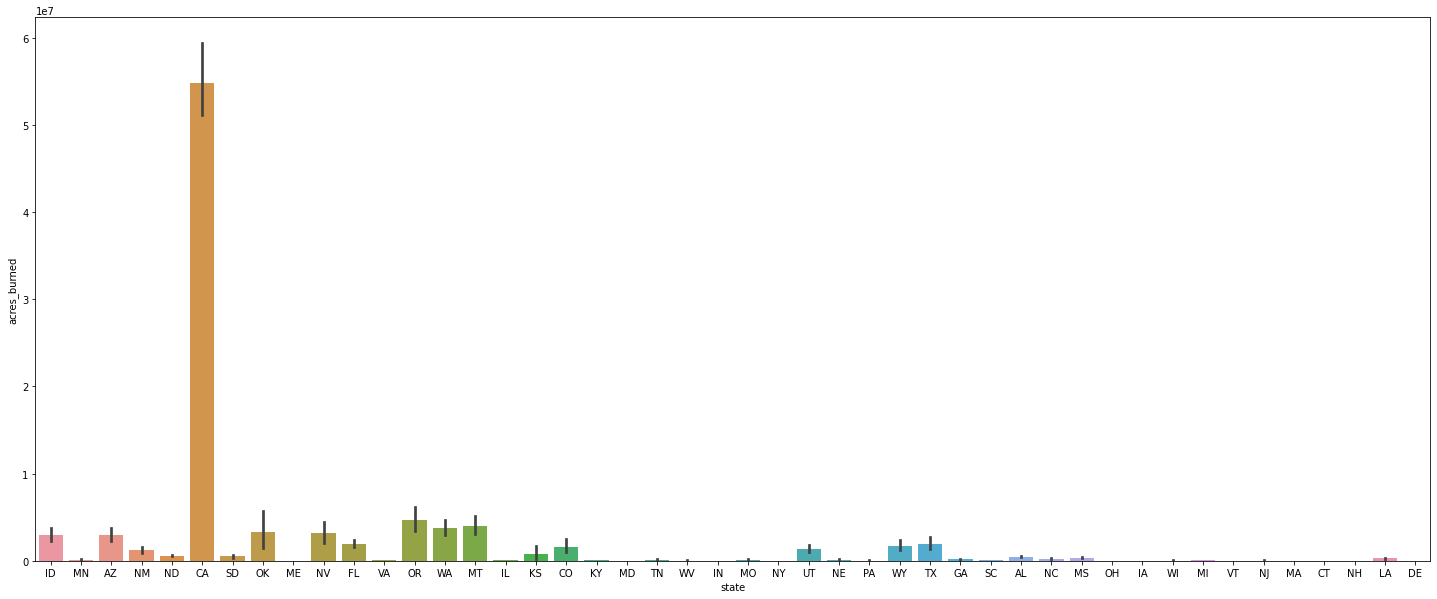

In [59]:
plt.figure(figsize=(25,10))

sns.barplot(x='state', y='acres_burned', data = df, estimator = np.sum );

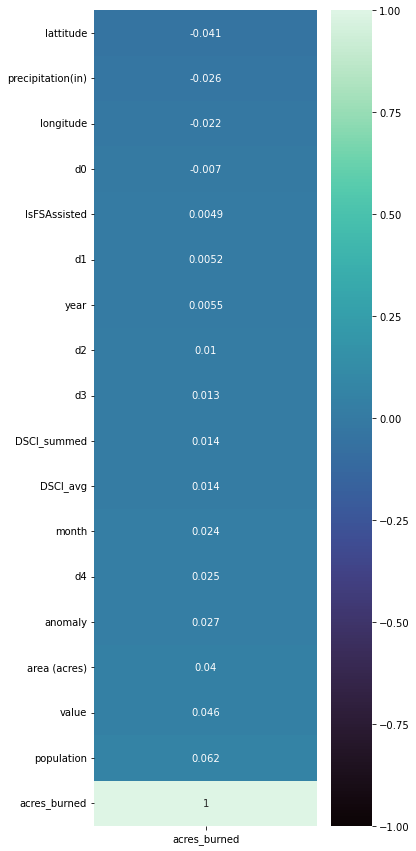

In [60]:
#Correlation for acres burned 
plt.figure(figsize = (5,15))
sns.heatmap(df.corr()[['acres_burned']].sort_values('acres_burned', ascending=True), annot = True, cmap = 'mako', vmin = -1, vmax = 1);

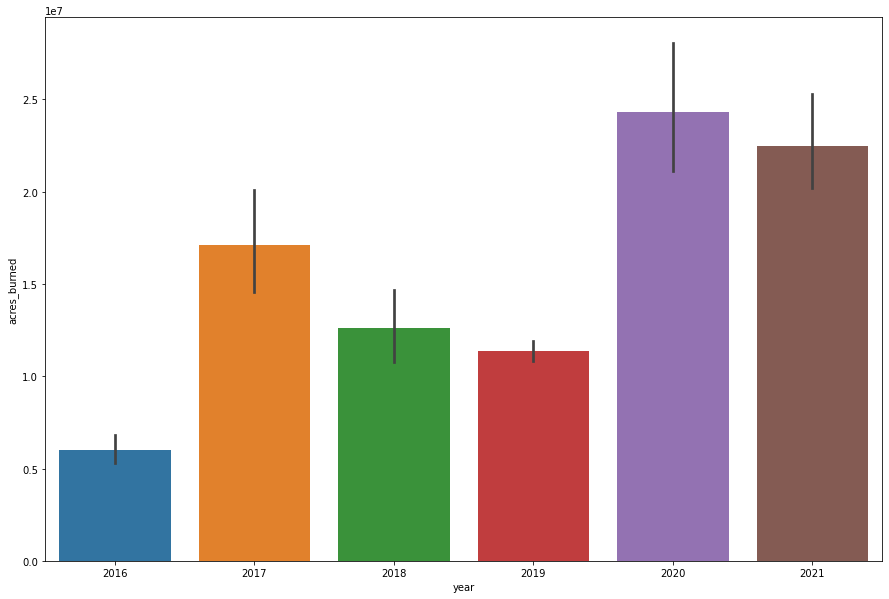

In [61]:
#Sum of acres burned by year 
plt.figure(figsize=(15,10))
sns.barplot(x='year', y='acres_burned', data = df, estimator = np.sum, );

In [62]:
conditions = [df['acres_burned'] <= .25,
             (df['acres_burned'] > .25) & (df['acres_burned'] <= 9.9),
             (df['acres_burned'] > 9.9) & (df['acres_burned'] <= 99.99),
             (df['acres_burned'] > 99.99) & (df['acres_burned'] <= 299),
             (df['acres_burned'] > 299) & (df['acres_burned'] <= 999),
             (df['acres_burned'] > 999) & (df['acres_burned'] <= 5000),
             (df['acres_burned'] > 5000) & (df['acres_burned'] <= 9999),
             (df['acres_burned'] > 9999) & (df['acres_burned'] <= 49_999),
             (df['acres_burned'] > 49_999) & (df['acres_burned'] <= 100_000),
              (df['acres_burned'] > 100_000)
                
             ]
choices = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
# choices = [0,1,2,3,4,5,6,7,8,9]

df['class'] = np.select(conditions, choices, default = 'A')

In [63]:
# def new_class(val):
#     if val <= .25:
#         return 1
#     elif val <= 9.9:
#         return 2
#     elif val <= 99.99:
#         return 3
#     elif val <= 299:
#         return 4
#     elif val <= 999:
#         return 5
#     elif val <= 5000:
#         return 6
#     elif val <= 9999:
#         return 7
#     elif val <= 49999:
#         return 8
#     else:
#         return 9
# df['new_class'] = df['acres_burned'].apply(new_class)

In [64]:
df['class'].value_counts()

0    55304
1    38521
2    22983
5    18783
4    17182
3    13396
7      499
6      431
8       91
9       83
Name: class, dtype: int64

In [65]:
over_300 = df.loc[df['acres_burned']>299]
over_300.shape

(37069, 23)

Text(0.5, 1.0, 'Number of fires by class')

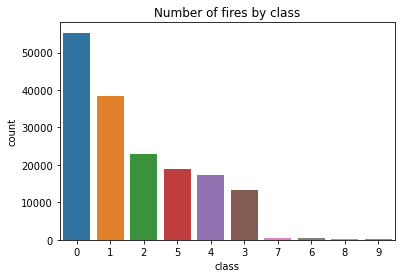

In [66]:
#Count of fires by class
sns.countplot(x='class',data = df, order = df['class'].value_counts().index);
plt.title('Number of fires by class')

In [67]:
df['class'].value_counts()

0    55304
1    38521
2    22983
5    18783
4    17182
3    13396
7      499
6      431
8       91
9       83
Name: class, dtype: int64

In [68]:
df['state'].value_counts().sort_index()

AL      849
AZ    12709
CA    40401
CO     6727
CT        4
DE        2
FL     3863
GA      339
IA      227
ID     7132
IL      419
IN      216
KS      396
KY      724
LA      533
MA       69
MD       65
ME     2927
MI     1207
MN     5672
MO      838
MS     1405
MT    12041
NC      609
ND     6772
NE      386
NH      100
NJ       60
NM     6395
NV     3810
NY      134
OH      397
OK     4603
OR    10058
PA      213
SC      687
SD     4337
TN      494
TX     5047
UT     7729
VA      429
VT       76
WA     8818
WI      323
WV      213
WY     6818
Name: state, dtype: int64

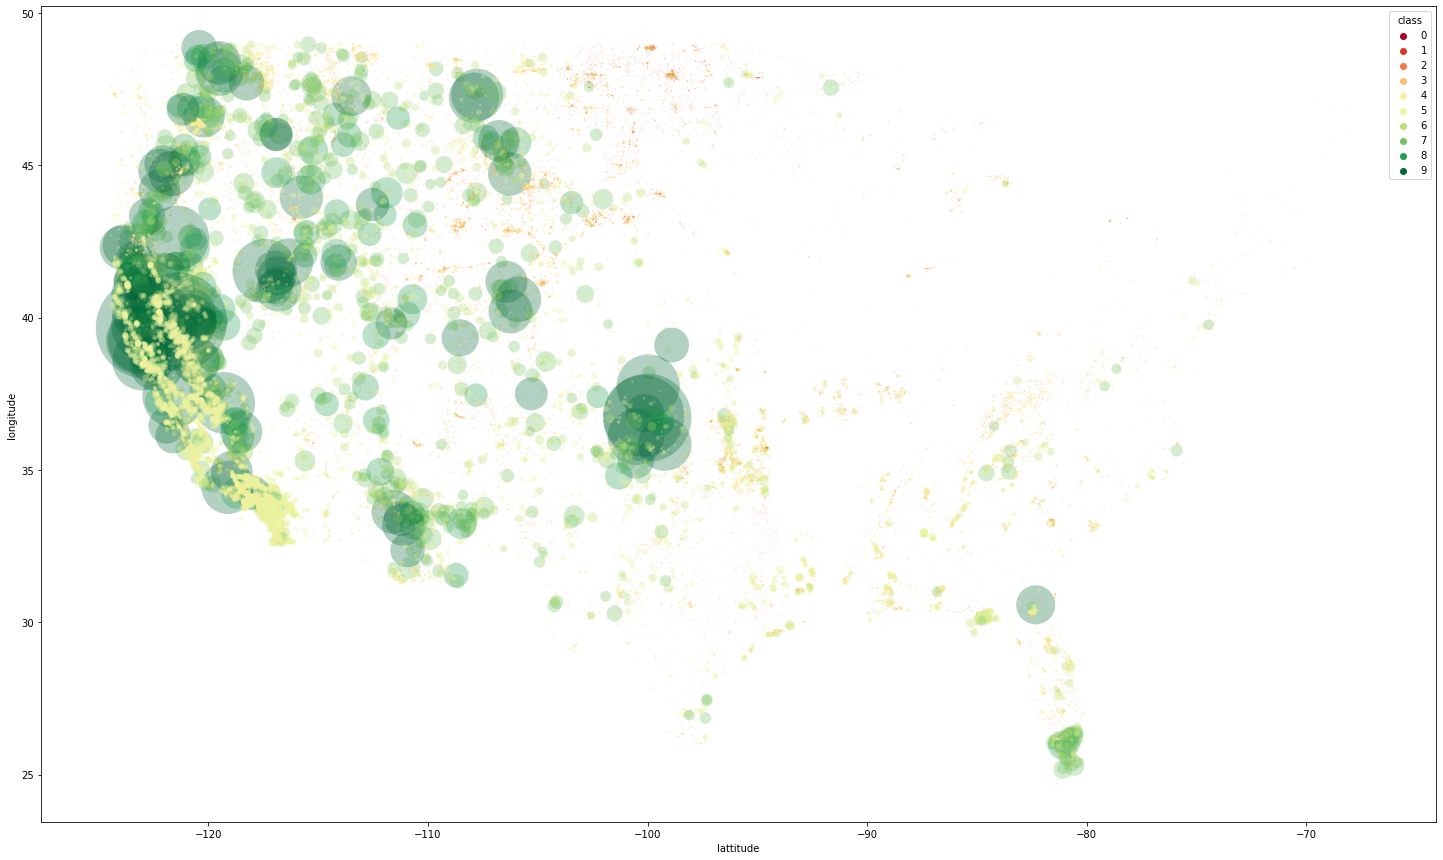

In [69]:
plt.figure(figsize=(25,15))
sns.scatterplot(x='lattitude', y='longitude', hue='class',alpha=.3, palette='RdYlGn', edgecolor=None, data=df, s = df['acres_burned']/100, legend = 'full');


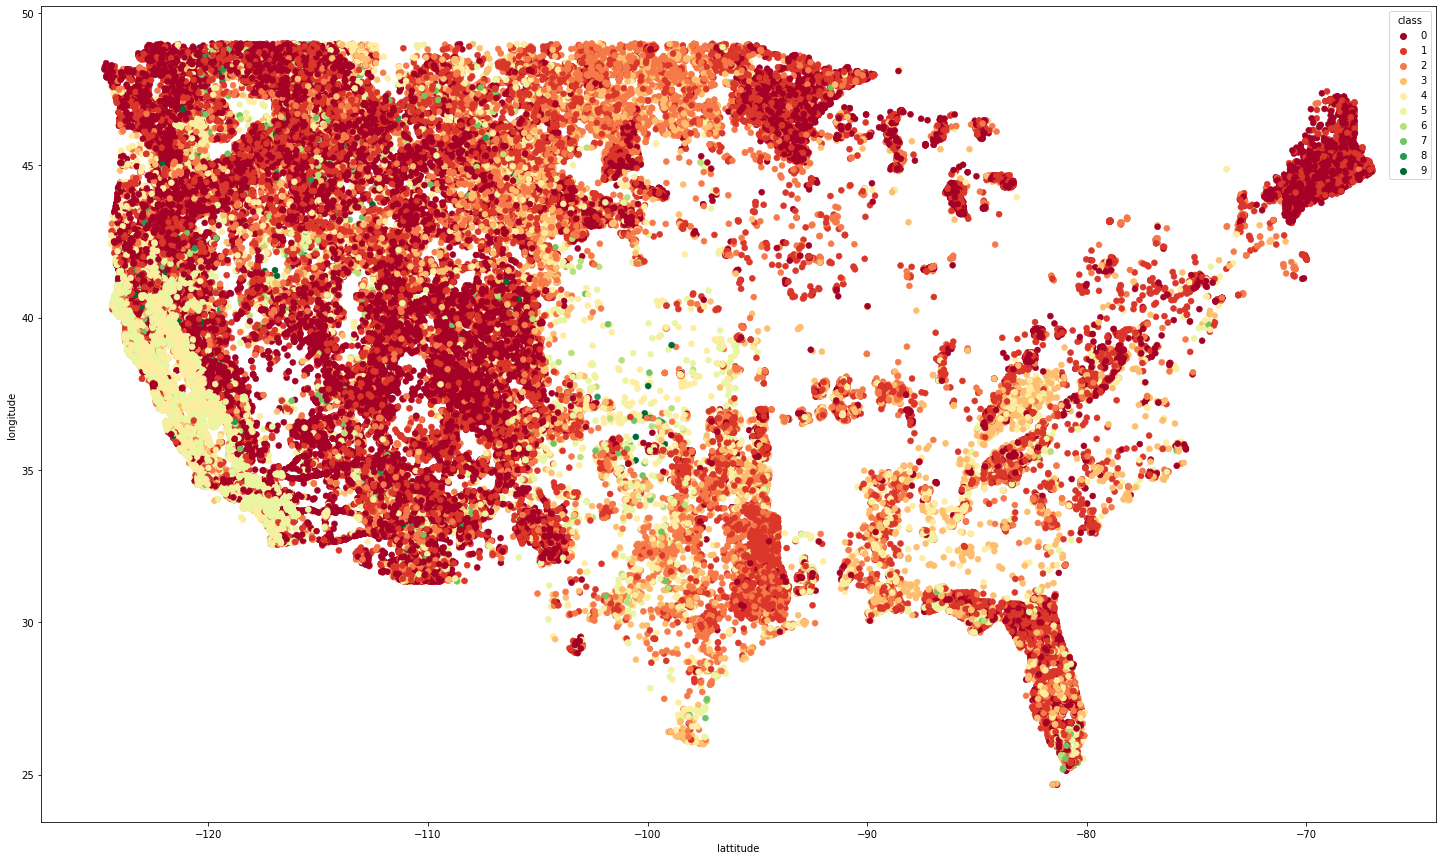

In [70]:
plt.figure(figsize=(25,15))
sns.scatterplot(x='lattitude', y='longitude', hue='class', palette='RdYlGn', edgecolor=None, data=df, legend = 'full');

In [71]:
len(df['state'].unique())

46

In [72]:
over_300['class'].value_counts()

5    18783
4    17182
7      499
6      431
8       91
9       83
Name: class, dtype: int64

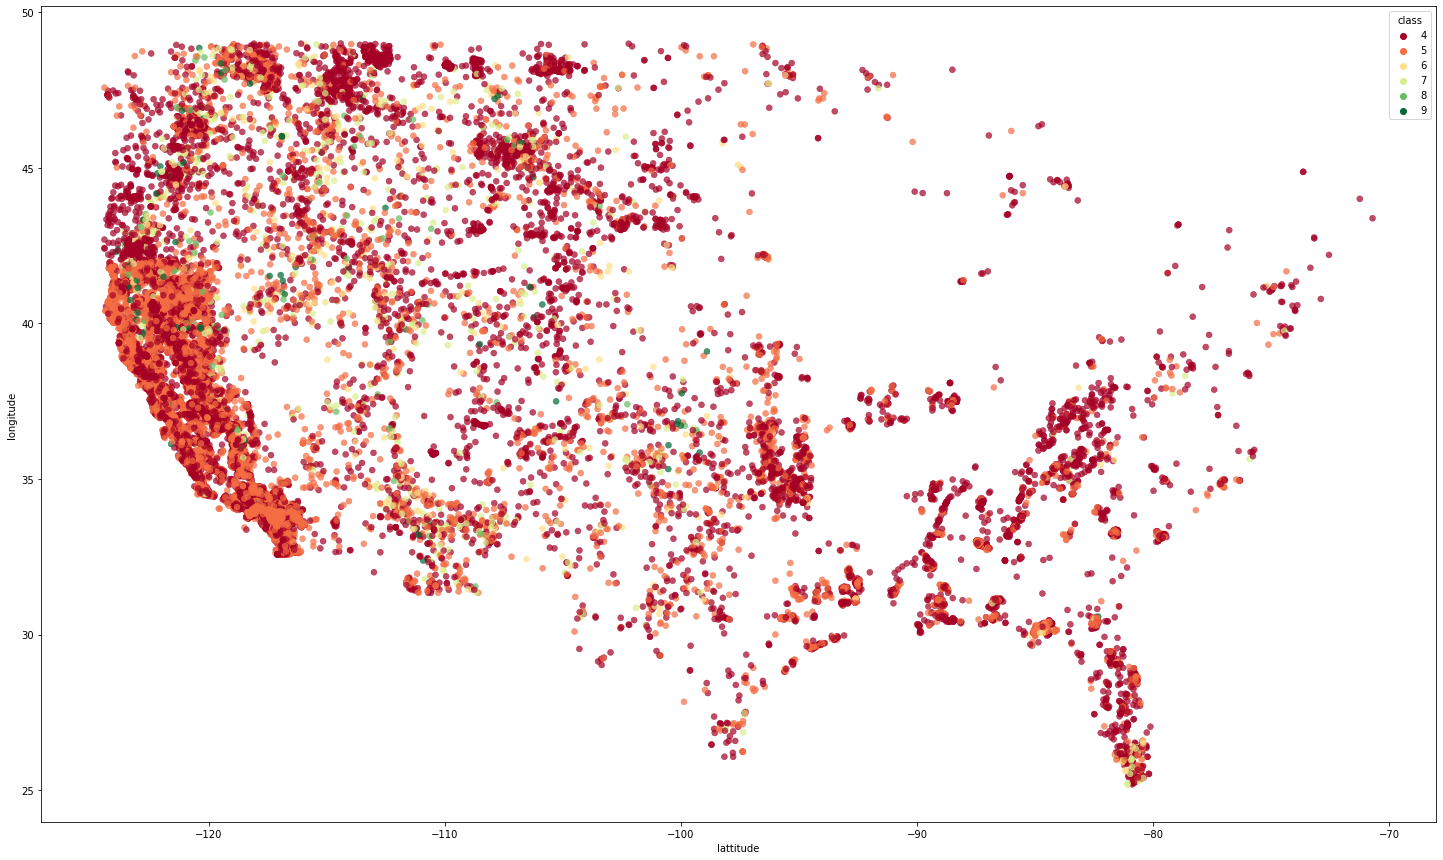

In [73]:
plt.figure(figsize=(25,15))
sns.scatterplot(x='lattitude', y='longitude', hue='class',alpha=.7, palette='RdYlGn', edgecolor=None, data=over_300, );

In [74]:

df.groupby('class')['precipitation(in)'].value_counts()

class  precipitation(in)
0      0.009808             494
       0.030618             464
       0.064522             441
       0.032686             416
       0.007439             393
                           ... 
9      0.052896               1
       0.053646               1
       0.079473               1
       0.116600               1
       0.134602               1
Name: precipitation(in), Length: 9170, dtype: int64

In [75]:
df.groupby('class')['DSCI_summed'].mean()


class
0    767.361584
1    663.280479
2    685.713141
3    730.109757
4    846.634660
5    914.977849
6    745.459072
7    801.249940
8    842.995055
9    975.985904
Name: DSCI_summed, dtype: float64

In [76]:
county = df.groupby('origin_county')['acres_burned'].value_counts().sort_values(ascending = False)
county.head()

origin_county  acres_burned
Los Angeles    1906.698008     2319
Coconino       0.100000        1917
Los Angeles    318.228425      1592
               3334.752896     1474
               775.071170      1219
Name: acres_burned, dtype: int64

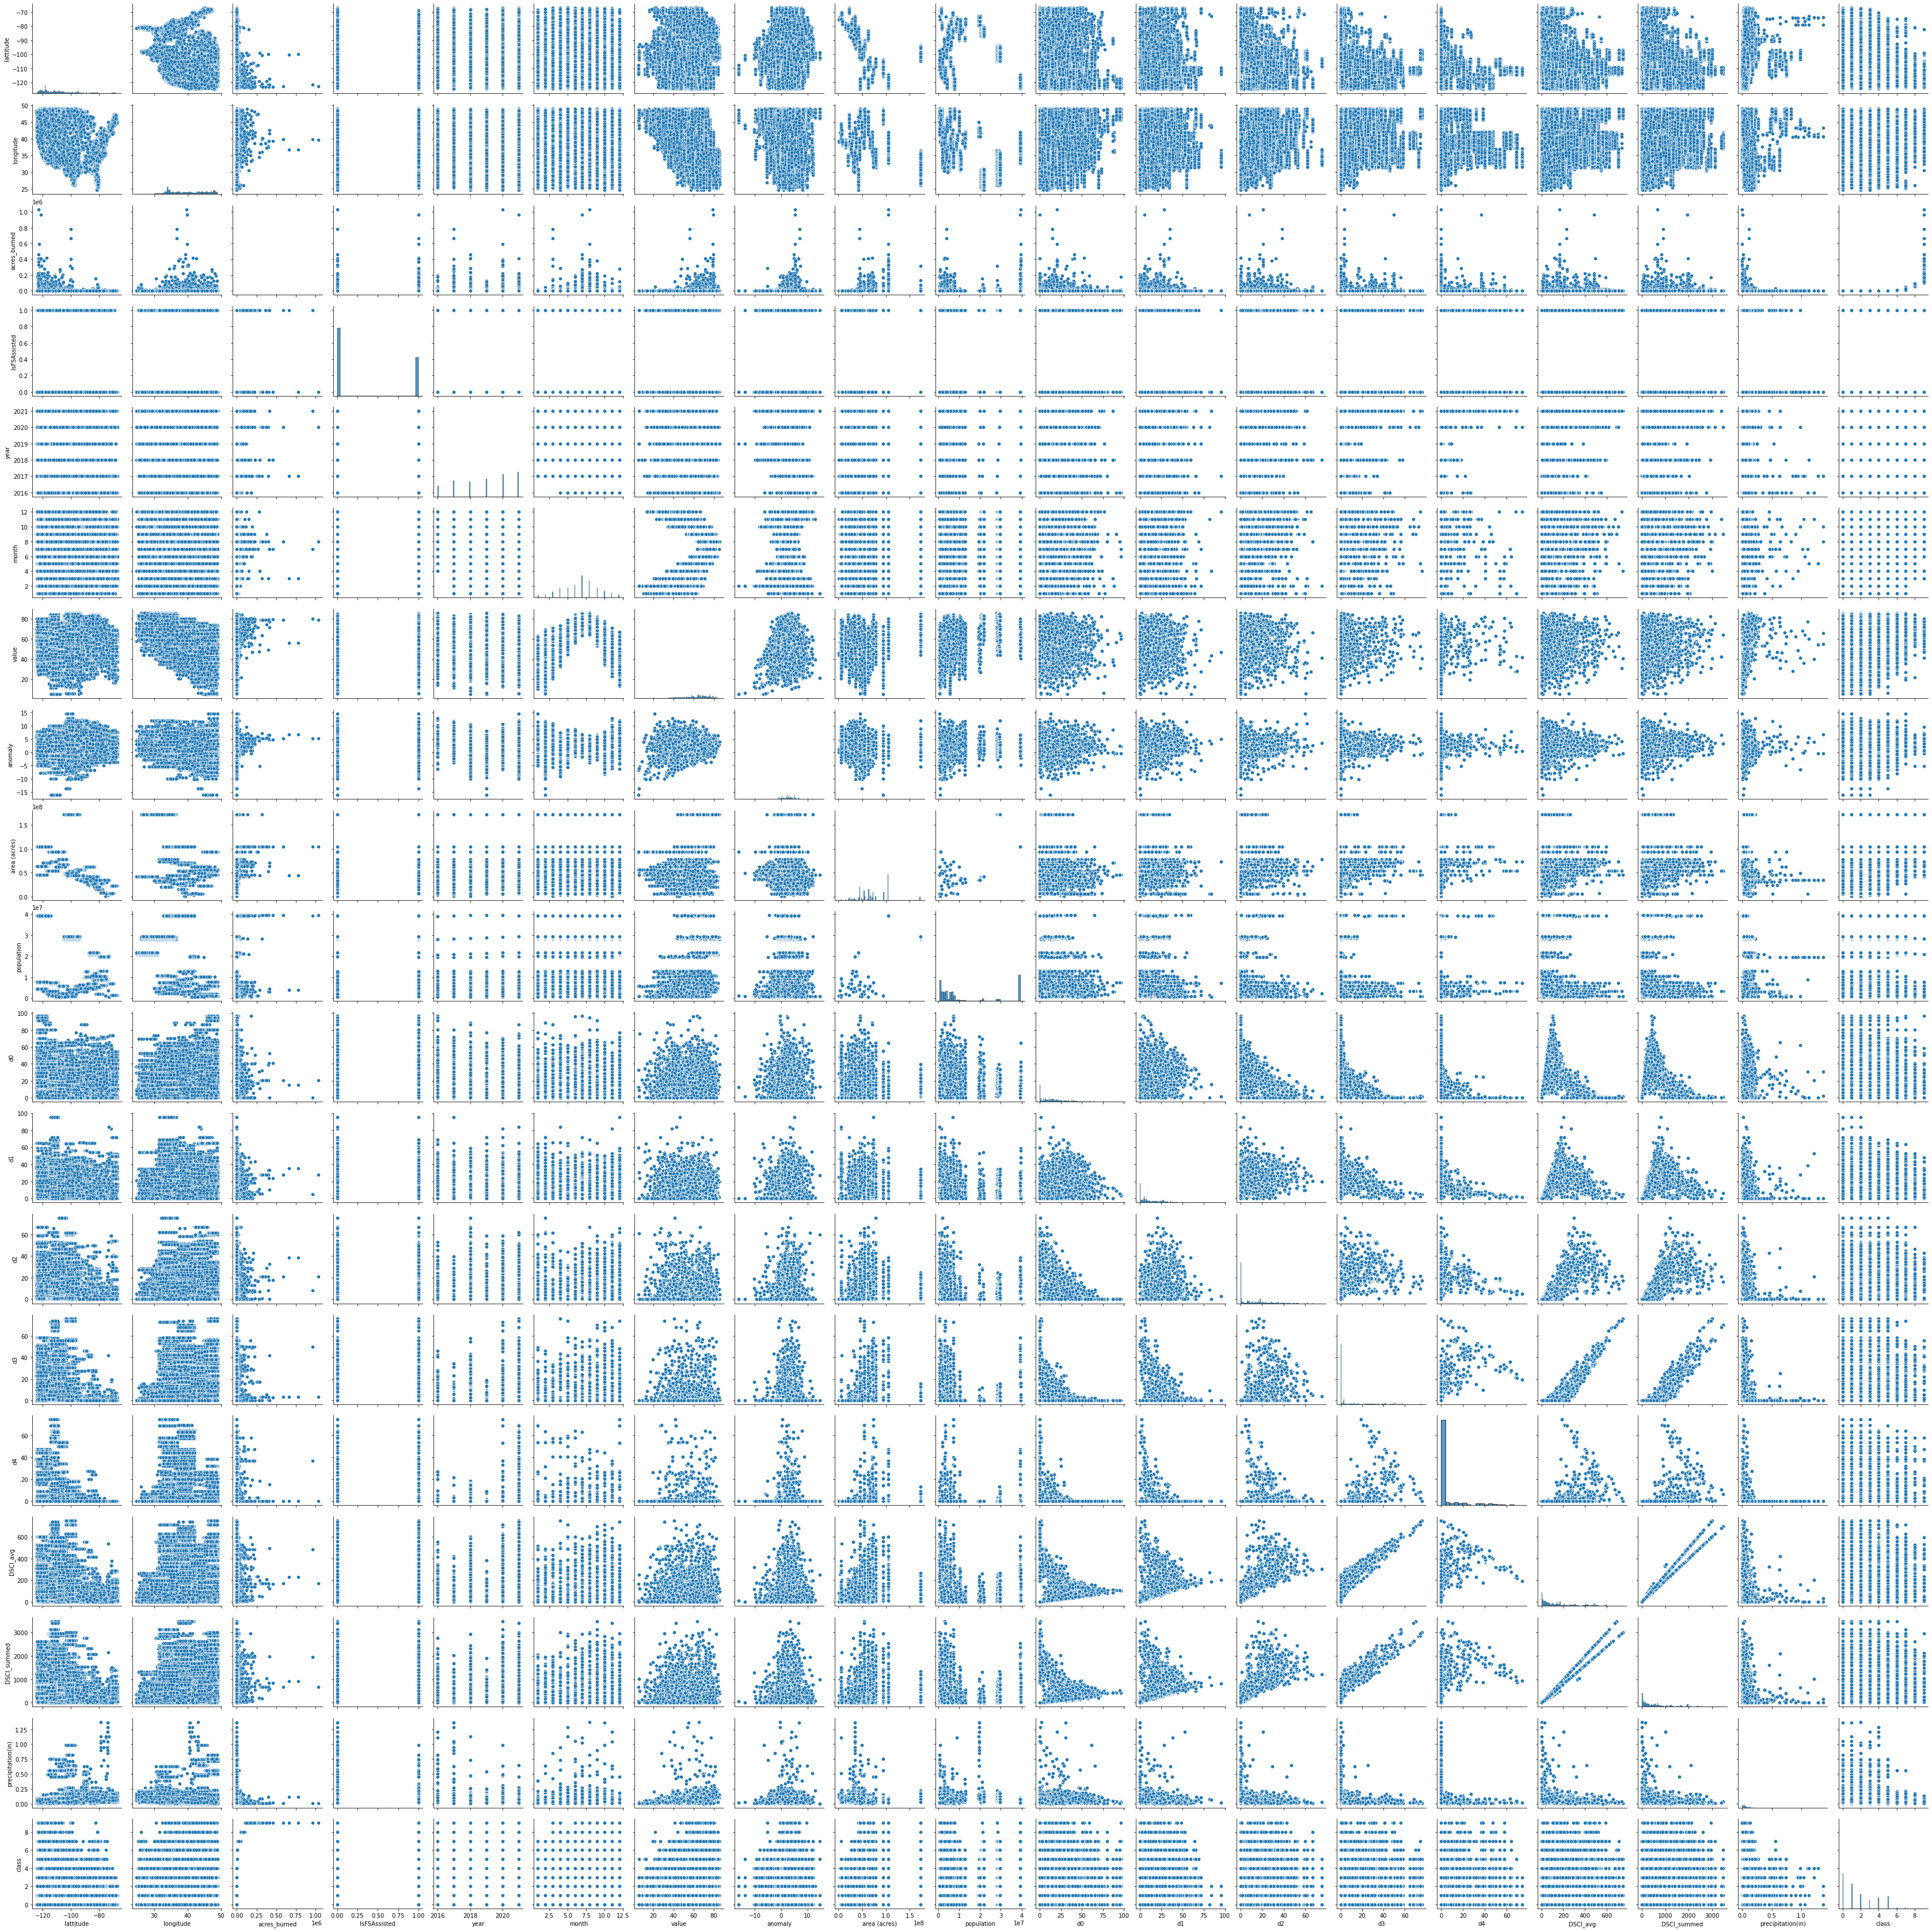

In [77]:
sns.pairplot(df)